In [1]:
# Add Matplotlib inline magic command

%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000
4,South Jack,3/6/2019 4:28,34.58,3908450000000
5,South Latoya,3/11/2019 12:26,9.52,1995000000000
6,New Paulville,2/27/2019 11:17,43.25,793208000000
7,Simpsonburgh,4/26/2019 0:43,35.98,111954000000
8,South Karenland,1/8/2019 3:28,35.09,7995620000000
9,North Jasmine,3/9/2019 6:26,42.81,5327640000000


In [5]:
# Get the columns are the rows that are not null.

city_data_df.count

<bound method DataFrame.count of                 city  driver_count   type
0        Richardfort            38  Urban
1       Williamsstad            59  Urban
2        Port Angela            67  Urban
3         Rodneyfort            34  Urban
4        West Robert            39  Urban
..               ...           ...    ...
115     Bradshawfurt             7  Rural
116     New Ryantown             2  Rural
117   Randallchester             9  Rural
118      Jessicaport             1  Rural
119  South Saramouth             7  Rural

[120 rows x 3 columns]>

In [6]:
# Get the columns and the rows that are not null.

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.

sum(city_data_df["type"]=="Urban")

66

In [10]:
sum(city_data_df["type"]=="Rural")

18

In [11]:
# Get the columns and the rows that are not null.

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columsn and rows that are not null.

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types of each column.

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


In [15]:
# Create the Urban city DataFrame.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


In [16]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [17]:
# Get the number of rides for urban cities.

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
# Create the suburban and rural ride count

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [19]:
# Get average fare for each city in the urban cities

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
# Get average fare for each city in the suburban and rural cities.

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [29]:
# Get the average number of drivers for each urban city

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head

<bound method NDFrame.head of city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64>

In [30]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]


rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

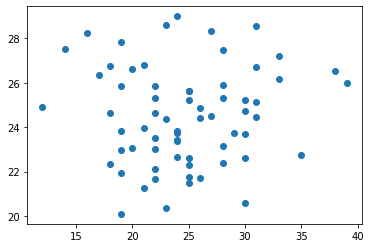

In [23]:
# Build the scatter plots for urban citites.

plt.scatter(urban_ride_count, urban_avg_fare)

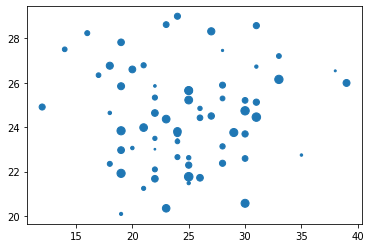

In [24]:
# Build the scatter plots for urban cities

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=urban_driver_count)

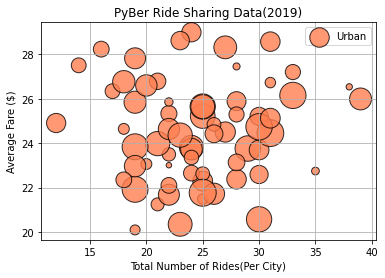

In [25]:
# Build the scatter plots for urban cities

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.title("PyBer Ride Sharing Data(2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides(Per City)")

plt.grid(True)

# Add the legend

plt.legend()

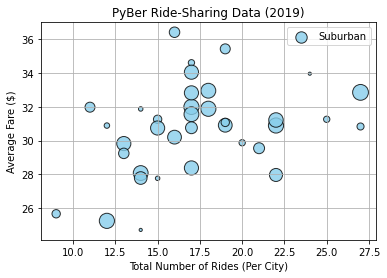

In [26]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

# Add the legend.

plt.legend()

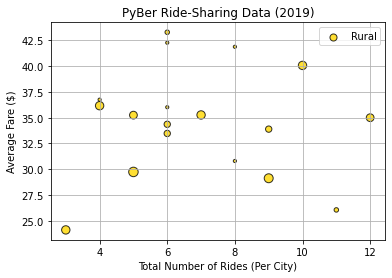

In [27]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

# Add the legend.

plt.legend()

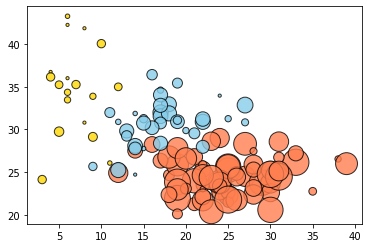

In [28]:
# Add the scatter charts for each type of city.

plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

In [ ]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

In [ ]:
# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.

plt.savefig("analysis/Fig1.png")

In [ ]:
# Get summary statistics.

urban_cities_df.describe()

In [ ]:
# ***SKILL DRILL***

#Summary Statistics for suburban cities

suburban_cities_df.describe()

In [ ]:
# Summary statistics for rural cities

rural_cities_df.describe()

In [ ]:
# Get summary statistics.

urban_ride_count.describe()

In [ ]:
rural_ride_count.describe()

In [ ]:
# Calculate the mean of the ride count for each city type.

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

In [ ]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

In [ ]:
# Calculate the mode of the ride count for the urban cities

urban_ride_count.mode()

In [ ]:
# Calculate the mode of the ride count for the suburban cities

suburban_ride_count.mode()

In [ ]:
# Import NumPy and the stats module from SciPy

import numpy as np
import scipy.stats as sts

In [ ]:
# Calculate the measures of central tendency for the ride count for the urban cities.

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

In [ ]:
# Calculate the measures of central tendency for the ride count for the suburban cities.

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

In [ ]:
# Calculate the measures of central tendency for the ride count for the rural cities.

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_urban_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

In [ ]:
# Get the fares for the urban cities.

urban_fares = urban_cities_df["fare"]

urban_fares.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the urban cities.

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

In [ ]:
# Get the fares for the suburban cities.

suburban_fares = suburban_cities_df["fare"]

suburban_fares.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

In [ ]:
# Get the fares for the urban cities.

rural_fares = rural_cities_df["fare"]

rural_fares.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(suburban_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

In [ ]:
# Get the driver count data from the urban cities.

urban_drivers = urban_cities_df['driver_count']

urban_drivers.head()

In [ ]:
#***SKILL DRILL*** 
# Calculate the measures of central tendency for the driver count for the urban cities.

mean_urban_driver_count = np.mean(urban_driver_count)
print(f"The mean for the driver counts for urban trips is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_driver_count)
print(f"The median for the driver counts for urban trips is {median_urban_driver_count}.")

mode_urban_driver_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for driver trips is {mode_urban_driver_count}.")

In [ ]:
suburban_drivers = urban_cities_df['driver_count']

suburban_drivers.head()

In [ ]:
#***SKILL DRILL*** 
# Calculate the measures of central tendency for the driver count for the suburban cities.


mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f"The mean for the driver counts for suburban trips is {mean_urban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_driver_count)
print(f"The median for the driver counts for suburban trips is {median_suburban_driver_count}.")

mode_suburban_driver_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for driver trips is {mode_suburban_driver_count}.")

In [ ]:
#***SKILL DRILL*** 
# Calculate the measures of central tendency for the driver count for the rural cities.

rural_drivers = rural_cities_df['driver_count']

rural_drivers.head()

In [ ]:
mean_rural_driver_count = np.mean(rural_driver_count)
print(f"The mean for the driver counts for rural trips is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_driver_count)
print(f"The median for the driver counts for rural trips is {median_rural_driver_count}.")

mode_rural_driver_count = sts.mode(rural_ride_count)
print(f"The mode for the driver counts for rural trips is {mode_rural_driver_count}.")

In [ ]:
# Create a box-and-whisker plot for the urban cities ride count.

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [ ]:
# Create a box-and-whisker plot for the suburban cities ride count.

x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [ ]:
# Create a box-and-whisker plot for the rural cities ride count.

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [ ]:
# Add all ride count box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [ ]:
# Get the city that matches 39.

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f"{urban_city_outlier} has the highest rider count.")

In [ ]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

In [ ]:
# ***Skill Drill***
# Create a box-and-whisker plot for the suburban fare data.

x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

In [ ]:
# Create a box-and-whisker plot for the rural fare data.

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

In [ ]:
# Add all ride fare data box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [ ]:
# Create the box-and-whisker plot for the urban driver count data.

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

In [ ]:
# ***Skill Drill***
# Create the box-and-whisker plot for the suburban driver count data.

x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

In [ ]:
# Create the box-and-whisker plot for the rural driver count data.

x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

In [ ]:
# ***Skill Drill***
# Get the box and whisper plot for all three city types' driver count data. 

# Add all ride fare data box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [ ]:
# Get the Percentage of fares for Each City Type

# Get the sum of the fares for each city type.

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

In [ ]:
# Get the sum of all the fares.

total_fares = pyber_data_df["fare"].sum()
total_fares

In [ ]:
# Calculate the percentage of fare for each city type.

type_percents = 100 * sum_fares_by_type / total_fares
type_percents

In [ ]:
# Calculate the percentage of fare for each city type.

type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

In [ ]:
# Build the percentage of fares by city type pie chart.

plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

In [ ]:
# Build the percentage of fares by city type pie chart.

plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Show Figure
plt.show()

In [ ]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()

In [ ]:
# 5.6.1 Calculate Ride Percentages

# Calculate the percentage of rides for each city type.

ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

In [ ]:
# Build percentage of rides by city type pie chart.

plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")

# Show Figure
plt.show()

In [ ]:
# 5.7.1 Percentage of total drivers by city type

# Calculate the percentage of drivers for each city type.

# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()
driver_percents

In [ ]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()